In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader


population = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "population.csv"))

sex(x) = x == 1 ? "male" : "female" # format for :sex

setformat!(population, :sex => sex)

pop2000 = filter(population, :year, by = ==(2000))

first(pop2000, 6)

,age,people,sex,year
,identity,identity,sex,identity
,Int64?,Int64?,Int64?,Int64?
1,0,9735380,male,2000
2,0,9310714,female,2000
3,5,10552146,male,2000
4,5,10069564,female,2000
5,10,10563233,male,2000
6,10,10022524,female,2000


Creating population pyramid using overlaid bar charts

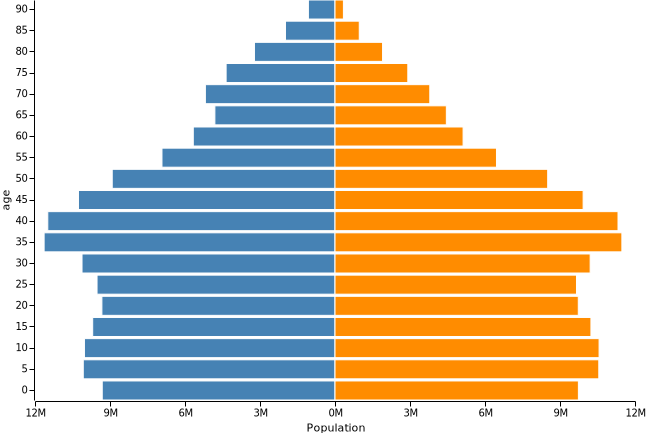

In [2]:
tpop = transpose(groupby(pop2000, :age), :people, id = :sex)

setformat!(tpop, :female => -)

sgplot(tpop, [Bar(y=:age, response=:female),
                  Bar(y=:age, response=:male, color=:darkorange)],
                  yaxis=Axis(reverse=true),
                  xaxis=Axis(title="Population", values=((-12:3:12).*10^6, string.(abs.(-12:3:12), "M"))))

For this example we can also use the `baselineresponse` keyword argument to create the pyramid.

We pass `values` to xaxis to make sure the labels are shown properly

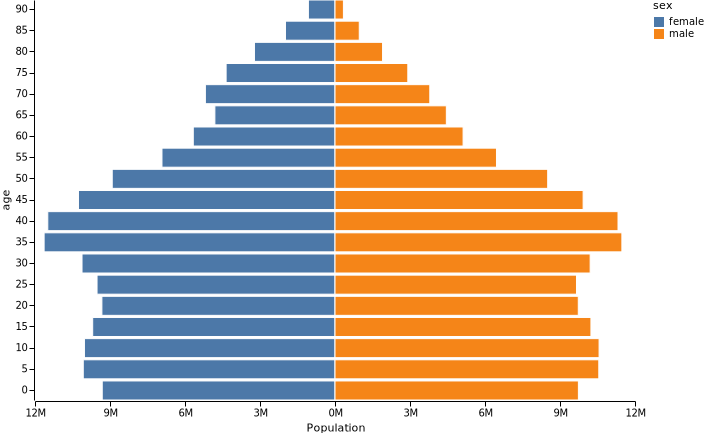

In [3]:
base_stat(f, x) = -last(x) # use the negative value of female pop as baseline

sgplot(pop2000, Bar(y=:age, response=:people, group=:sex,
                            baselineresponse = :people,
                            baselinestat=base_stat),
                            yaxis=Axis(reverse=true),
                            xaxis=Axis(title="Population", values=((-12:3:12).*10^6, string.(abs.(-12:3:12), "M"))))

**[Stacked Bar Chart, Diverging](https://observablehq.com/@d3/diverging-stacked-bar-chart)**

Reproducing an example from the [`D3`](http://d3js.org)`s examples collection.

Using the `baselineresponse` keyword argument to control the baseline of bars in each category.

┌ Warning: the last line is not ended with `end of line` character
└ @ DLMReader ~/.julia/packages/DLMReader/gB2Mj/src/reader.jl:449


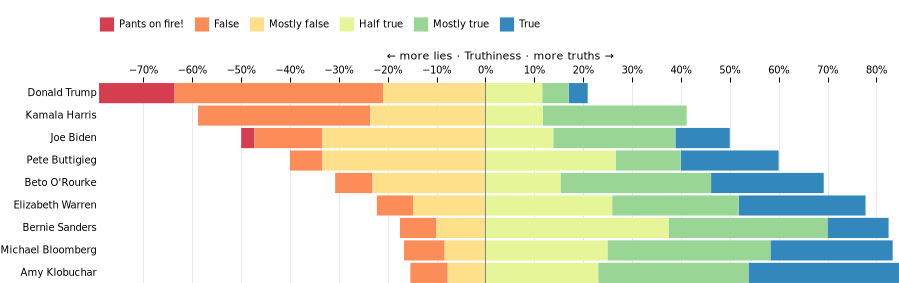

In [4]:
ds = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                              "..", "docs", "assets", "politifact.csv"))
ds_order = Dataset(ruling = ["true", "mostly-true", "half-true","barely-true", "false", "full-flop", "pants-fire"],
                  Ruling = ["True", "Mostly true", "Half true", "Mostly false", "False", "False", "Pants on fire!"],
                  order = 1:7,
                  weight = [0,0,0,-1,-1,-1,-1])
leftjoin!(ds, ds_order, on = :ruling)
sort!(ds, [:order], rev=true) # order Ruling
modify!(
        groupby(ds, :speaker),
        :count=> x->x ./ IMD.sum(x), # normalise counts
        [:count, :weight]=> byrow(prod) =>:baseline
        )

sgplot(
        ds,
        [
          Bar(y=:speaker, response=:count,
              group=:Ruling,
              grouporder=:data,
              baselineresponse=:baseline,
              orderresponse=:baseline,
              outlinethickness=0.1,
              legend = :bar_leg,
              x2axis=true
            ),
          RefLine(values = 0.0, axis=:x2axis)
        ],
        x2axis=Axis(title = "← more lies · Truthiness · more truths →", domain = false, d3format="%", nice=false, grid=true),
        yaxis=Axis(title = "", domain = false, ticks = false),
        legend = Legend(name = :bar_leg, title = "", orient=:top, columns=0, size=200, columnspace = 10 ),
        width=800,
        height=200,
        groupcolormodel=["#d53e4f", "#fc8d59", "#fee08b", "#e6f598", "#99d594", "#3288bd"]
    )

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*